In [2]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
import csv
import pandas as pd
%matplotlib inline

In [32]:
filename='csv/csv_3.csv'

#Read csv
pdf = pd.read_csv(filename)
pdf.head(5)

,X,Y
0,0.006405,-1.729048
1,-0.204582,3.872284
2,-1.383501,0.592491
3,2.788656,2.920716
4,4.081046,5.693715


In [79]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['X','Y']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.1, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

In [80]:
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2}

In [81]:
# Cria cores para os clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
colors

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.99346405, 0.74771242, 0.43529412, 1.        ],
       [0.74771242, 0.89803922, 0.62745098, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

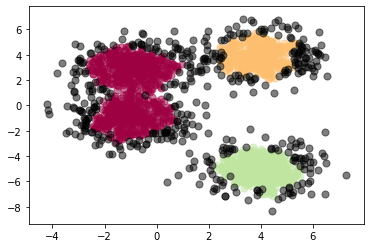

In [82]:
# Plota os pontos com cores
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plota os pontos que estão agrupados
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=col, marker=u'o', alpha=0.5)

    # Plota os outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=col, marker=u'o', alpha=0.5)